In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# df_cifar = pd.read_csv("../../RESULTS/060221-073204_CIFAR10_metrics.csv")
# df_svhn = pd.read_csv("../../RESULTS/060221-051821_SVHN_metrics.csv")
df_cifar = pd.read_csv("../../REALRESULTS/060221-221129_CIFAR10_metrics.csv")
df_svhn = pd.read_csv("../../REALRESULTS/060221-223821_SVHN_metrics.csv")

In [3]:
sample_types = np.array(['rand', 'kmeans', 'loss_based_mean', 'loss_based_std',
       'grad_based_mean', 'grad_based_std'])
percentages = 100 * np.array([0.0025, 0.005, 0.0075, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1])

In [4]:
# Mask 1 is which sample_types you want from df 1
def merge_dfs(df1, df2, mask_1):
    mask = np.array(mask_1)
    df1_masked = df1[df1["sampler_type"].isin(mask)]
    df2_masked = df2[~df2["sampler_type"].isin(mask)]
    df_final = pd.concat([df1_masked,df2_masked])
    return df_final
    

In [5]:
def get_rankings(scores, num): # first num percentages to rank
    total_rankings = defaultdict(int)
    for index, percentage in enumerate(percentages[:num]):
        names = sorted(scores.items(), key=lambda item: item[1][index], reverse=True)
        ranking = [names[0][0], names[1][0], names[2][0], names[3][0], names[4][0], names[5][0]]
        
        for rank, name in enumerate(ranking):
            total_rankings[name] = total_rankings[name] + (rank + 1)
        
    for key, value in total_rankings.items():
        print(key, value / num) # divide by total
        


def plot_metrics(df_full, ds, num_to_rank=5):
    df = df_full.groupby(["ds_type", "sampler_type", "num_examples"]).mean().reset_index()
    plt.figure()
    scores = {}
    for sample_type in df["sampler_type"].unique():
        num_examples = df[df.sampler_type == sample_type]["num_examples"].tolist()
        lr_acc = df[df.sampler_type == sample_type]["lr_byol_acc"].tolist()
        scores[sample_type] = lr_acc
        plt.scatter(np.arange(len(num_examples)), lr_acc, label=sample_type)

    get_rankings(scores, num_to_rank)
        
    plt.legend()
    plt.xticks(np.arange(len(percentages)), percentages)
    plt.title("Top-1 Acc {}".format(ds))
    plt.show()
    
    scores = {}
    plt.figure()
    for sample_type in df["sampler_type"].unique():
        num_examples = df[df.sampler_type == sample_type]["num_examples"].tolist()
        lr_acc = df[df.sampler_type == sample_type]["lr_byol_top3_acc"].tolist()
        scores[sample_type] = lr_acc
        plt.scatter(np.arange(len(num_examples)), lr_acc, label=sample_type)

    get_rankings(scores, num_to_rank)
    
    plt.legend()
    plt.xticks(np.arange(len(percentages)), percentages)
    plt.title("Top-3 Acc {}".format(ds))
    plt.show()

loss_based_std 4.2
grad_based_mean 2.2
rand 2.2
loss_based_mean 5.4
kmeans 2.8
grad_based_std 4.2


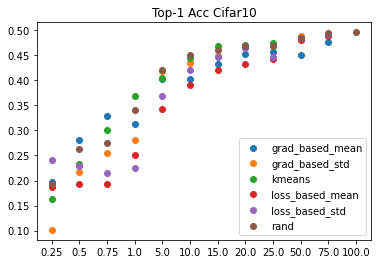

loss_based_std 4.4
grad_based_mean 2.0
rand 2.2
loss_based_mean 5.2
kmeans 3.0
grad_based_std 4.2


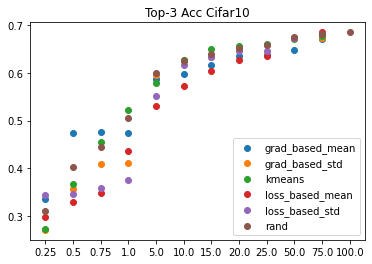

In [6]:
plot_metrics(df_cifar, "Cifar10")

loss_based_std 2.0
rand 2.2
loss_based_mean 3.4
kmeans 3.0
grad_based_std 5.0
grad_based_mean 5.4


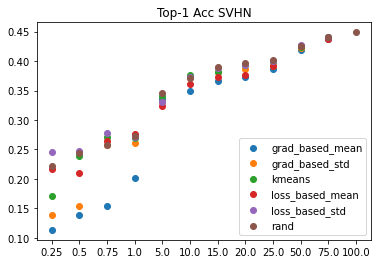

loss_based_std 2.4
rand 1.6
loss_based_mean 4.0
kmeans 2.6
grad_based_mean 5.4
grad_based_std 5.0


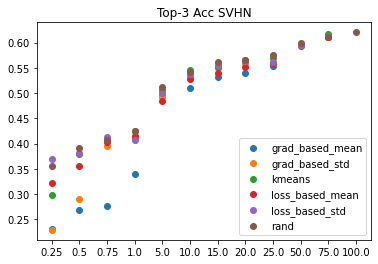

In [7]:
plot_metrics(df_svhn, "SVHN")